In [6]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
Z = 14
col2 = (0.0,0.5,1.0)
col3 = (0.2,0.9,0.5)

In [2]:
def read_file(fname):
    f = open(fname, "r")
    fl = f.readlines()
    f.close()

    coldata = defaultdict(list)

    for line in fl:
        if "#" not in line:
            ls = line.split()
            for i, val in enumerate(ls):
                coldata[i].append(float(val))
    return coldata

In [3]:
f2 = read_file("Review/3_production_LIG2_SUB-nonwaters-all3_michaelis-bimetallic-NEW.sfu")
f3 = read_file("Review/3_production_LIG3_SUB-25ns-nonwaters_restimes_bimetallic-cplx-NEW.sfu")

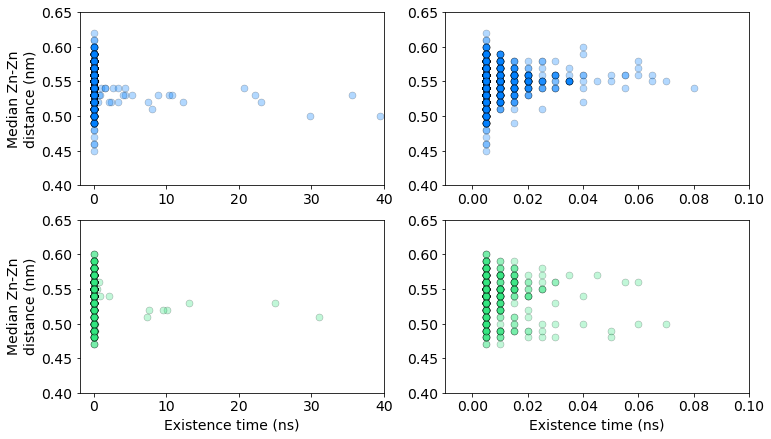

In [20]:
fig, axs = plt.subplots(figsize=(12,7), ncols=2, nrows=2, gridspec_kw={'hspace':0.2, 'wspace':0.2})
for ax in axs.flatten():
    ax.set_ylim(0.4, 0.65)
    ax.tick_params(labelsize=Z)
for ax in axs[:,0]:
    ax.set_ylabel('Median Zn-Zn\ndistance (nm)', fontsize=Z)
    ax.set_xlim(-2, 40)    
for ax in axs[:,1]:
    ax.set_xlim(-0.01, 0.1)
    ax.set_xticks(np.linspace(0,0.1,6))

for ax in axs[1,:]:
    ax.set_xlabel('Existence time (ns)', fontsize=Z)
axs[0,0].errorbar(np.array(f2[0])/1000, f2[5], alpha=0.3, fmt='o', mec='k', mew=0.5, ms=7, mfc=col2)
axs[0,1].errorbar(np.array(f2[0])/1000, f2[5], alpha=0.3, fmt='o', mec='k', mew=0.5, ms=7, mfc=col2)
axs[1,0].errorbar(np.array(f3[0])/1000, f3[5], alpha=0.3, fmt='o', mec='k', mew=0.5, ms=7, mfc=col3)
axs[1,1].errorbar(np.array(f3[0])/1000, f3[5], alpha=0.3, fmt='o', mec='k', mew=0.5, ms=7, mfc=col3)
plt.savefig('Review/Time-Dist-Bound.png', format='png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

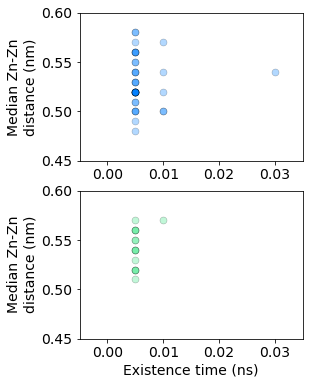

In [30]:
fig, axs = plt.subplots(figsize=(4,6), ncols=1, nrows=2, gridspec_kw={'hspace':0.2, 'wspace':0.2})
for ax in axs:
    ax.set_ylim(0.45, 0.6)
    ax.tick_params(labelsize=Z)
    ax.set_ylabel('Median Zn-Zn\ndistance (nm)', fontsize=Z)
    ax.set_xlim(-0.005,0.035)    
    #ax.set_xticks(np.linspace(0,0.1,6))
axs[1].set_xlabel('Existence time (ns)', fontsize=Z)
axs[0].errorbar(np.array(f2[6])/1000, f2[11], alpha=0.3, fmt='o', mec='k', mew=0.5, ms=7, mfc=col2)
axs[1].errorbar(np.array(f3[6])/1000, f3[11], alpha=0.3, fmt='o', mec='k', mew=0.5, ms=7, mfc=col3)
plt.savefig('Review/Time-Dist-Precat.png', format='png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

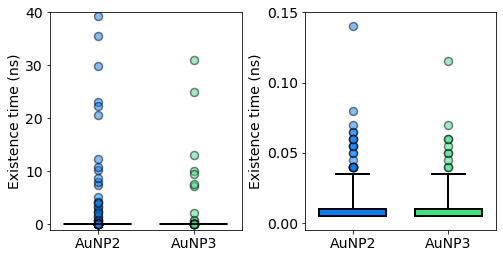

In [54]:
bp = dict(linestyle='-', lw=2, color='k', facecolor='r')
fp = dict(marker='o', ms=8, ls='none', mec='k', mew=1.5, alpha=0.5)
mp = dict(ls='-', lw=1.5, color='k')
cp = dict(ls='-', lw=2, color='k')
wp = dict(ls='-', lw=2, color='k')

fig, axs = plt.subplots(figsize=(8,4), ncols=2, gridspec_kw={'wspace':0.33})
lims = [(-1, 40), (-0.005,0.15)]
axs[1].set_yticks(np.linspace(0,0.15,4))
for ax, lim in zip(axs, lims):
    ax.set_ylim(lim)
    ax.tick_params(labelsize=Z)
    ax.set_ylabel('Existence time (ns)', fontsize=Z)
    data = [np.array(f2[0])/1000, np.array(f3[0])/1000]
    cols = [col2, col3]
    for i, (d, col) in enumerate(zip(data, cols)):
        bpl = ax.boxplot(d, positions=[i], whis=[5,95], widths=0.7, patch_artist=True,
                         boxprops=bp, flierprops=fp, medianprops=mp, capprops=cp, whiskerprops=wp, vert=True)
        for box in bpl['boxes']:
                box.set_facecolor(col)
        for flier in bpl['fliers']:
            flier.set_markerfacecolor(col)
    ax.set_xticklabels(["AuNP2", "AuNP3"])
plt.savefig('Review/time_bound.png', format='png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

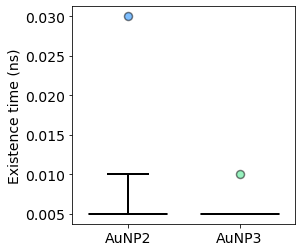

In [60]:
bp = dict(linestyle='-', lw=2, color='k', facecolor='r')
fp = dict(marker='o', ms=8, ls='none', mec='k', mew=1.5, alpha=0.5)
mp = dict(ls='-', lw=1.5, color='k')
cp = dict(ls='-', lw=2, color='k')
wp = dict(ls='-', lw=2, color='k')

fig, ax = plt.subplots(figsize=(4,4), ncols=1)
ax.tick_params(labelsize=Z)
ax.set_ylabel('Existence time (ns)', fontsize=Z)
data = [np.array(f2[6])/1000, np.array(f3[6])/1000]
cols = [col2, col3]
for i, (d, col) in enumerate(zip(data, cols)):
    bpl = ax.boxplot(d, positions=[i], whis=[5,95], widths=0.7, patch_artist=True,
                     boxprops=bp, flierprops=fp, medianprops=mp, capprops=cp, whiskerprops=wp, vert=True)
    for box in bpl['boxes']:
            box.set_facecolor(col)
    for flier in bpl['fliers']:
        flier.set_markerfacecolor(col)
ax.set_xticklabels(["AuNP2", "AuNP3"])
plt.savefig('Review/time_precat.png', format='png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

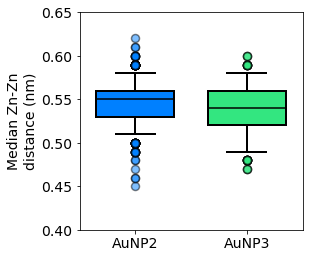

In [66]:
bp = dict(linestyle='-', lw=2, color='k', facecolor='r')
fp = dict(marker='o', ms=8, ls='none', mec='k', mew=1.5, alpha=0.5)
mp = dict(ls='-', lw=1.5, color='k')
cp = dict(ls='-', lw=2, color='k')
wp = dict(ls='-', lw=2, color='k')

fig, ax = plt.subplots(figsize=(4,4))
ax.set_ylim(0.4,0.65)
ax.tick_params(labelsize=Z)
ax.set_ylabel('Median Zn-Zn\ndistance (nm)', fontsize=Z)
data = [np.array(f2[5]), np.array(f3[5])]
cols = [col2, col3]
for i, (d, col) in enumerate(zip(data, cols)):
    bpl = ax.boxplot(d, positions=[i], whis=[5,95], widths=0.7, patch_artist=True,
                     boxprops=bp, flierprops=fp, medianprops=mp, capprops=cp, whiskerprops=wp, vert=True)
    for box in bpl['boxes']:
            box.set_facecolor(col)
    for flier in bpl['fliers']:
        flier.set_markerfacecolor(col)
ax.set_xticklabels(["AuNP2", "AuNP3"])
plt.savefig('Review/dist_bound.png', format='png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

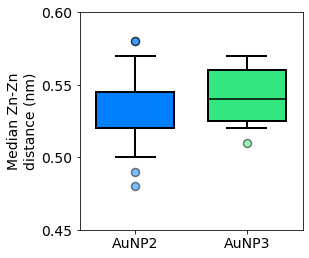

In [69]:
bp = dict(linestyle='-', lw=2, color='k', facecolor='r')
fp = dict(marker='o', ms=8, ls='none', mec='k', mew=1.5, alpha=0.5)
mp = dict(ls='-', lw=1.5, color='k')
cp = dict(ls='-', lw=2, color='k')
wp = dict(ls='-', lw=2, color='k')

fig, ax = plt.subplots(figsize=(4,4))
ax.set_ylim(0.45,0.6)
ax.tick_params(labelsize=Z)
ax.set_ylabel('Median Zn-Zn\ndistance (nm)', fontsize=Z)
ax.set_yticks(np.linspace(0.45,0.6,4))
data = [np.array(f2[11]), np.array(f3[11])]
cols = [col2, col3]
for i, (d, col) in enumerate(zip(data, cols)):
    bpl = ax.boxplot(d, positions=[i], whis=[5,95], widths=0.7, patch_artist=True,
                     boxprops=bp, flierprops=fp, medianprops=mp, capprops=cp, whiskerprops=wp, vert=True)
    for box in bpl['boxes']:
            box.set_facecolor(col)
    for flier in bpl['fliers']:
        flier.set_markerfacecolor(col)
ax.set_xticklabels(["AuNP2", "AuNP3"])
plt.savefig('Review/dist_precat.png', format='png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()